In [8]:
# Import necessary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import imblearn
import sklearn

In [9]:
acci_strtindex = pd.read_csv('./data/bikecollisiondata_with_nearest_street_index2.csv',sep = ',')

In [10]:
# data clearning on speedlimit 
numeric_features = ['SEGLENGTH','SURFACEWID', 'PVMTCONDIN', 'PVMTCOND_1','SLOPE_PCT' ]
categorical_features = ['SPEEDLIMIT', 'ARTCLASS', 'SEGDIR', 'ONEWAY', 'SURFACETYP','NATIONHWYS' ,'PVMTCATEGO', 'PARKBOULEV' ,'TRANDESCRI']
#X = strt2[numeric_features + categorical_features ].copy()
#y = strt2['acc']

In [11]:
len(acci_strtindex)

5707

In [12]:
type(acci_strtindex['INCDATE'][0])

str

In [13]:
acci_strtindex['date'] = pd.to_datetime(acci_strtindex['INCDATE']).dt.date

In [14]:
pd.to_datetime(acci_strtindex['INCDTTM'])

0      2006-05-16 06:30:00
1      2007-02-27 10:40:00
2      2007-06-02 00:00:00
3      2008-08-05 00:00:00
4      2011-12-07 21:57:00
               ...        
5702   2019-07-10 10:21:00
5703   2019-07-13 16:36:00
5704   2019-06-01 19:56:00
5705   2019-06-29 17:21:00
5706   2019-04-26 16:42:00
Name: INCDTTM, Length: 5707, dtype: datetime64[ns]

In [15]:
acci_strtindex['time'] = pd.to_datetime(acci_strtindex['INCDTTM']).dt.time

In [16]:
acci_strtindex['year'] = pd.to_datetime(acci_strtindex['INCDTTM']).dt.year
acci_strtindex['year'].unique()

array([2006, 2007, 2008, 2011, 2012, 2009, 2013, 2010, 2014, 2016, 2015,
       2018, 2017, 2004, 2019, 2005])

In [17]:
acci_strtindex['hour'] = pd.to_datetime(acci_strtindex['INCDTTM']).dt.hour
acci_strtindex['hour'] = [np.nan if i == 0 else i for i in acci_strtindex['hour']]

In [18]:
acci_strtindex['dayofweek'] = pd.to_datetime(acci_strtindex['INCDATE']).dt.dayofweek

In [19]:
acci_strtindex['weekday'] = [1 if i <= 4 else 0 for i in acci_strtindex['dayofweek']] # Monday is 0 Sunday is 6 
#weekday is 1 weekend is 0 

In [20]:
acci_strtindex['weekday'].sum()

4690

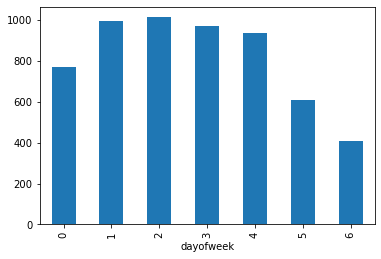

In [21]:
acci_strtindex.groupby('dayofweek').size().plot.bar()

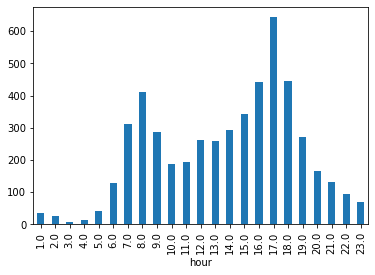

In [22]:
acci_strtindex.groupby('hour').size().plot.bar()

In [24]:
acci_strtindex.groupby('weather_group').size()

weather_group
Clear or Partly Cloudy    4129
Overcast                   810
Raining                    631
dtype: int64

In [25]:
## further group by rain or not 
weather_group2 = np.empty(len(acci_strtindex), dtype = object)
for i in np.arange(0,len(acci_strtindex['weather_group'])):
        weather = acci_strtindex['weather_group'][i] 
        if ( weather == 'Overcast' ):
            weather_group2[i] = 'Clear or Partly Cloudy'
        else:
            weather_group2[i] = weather

In [26]:
acci_strtindex['weather_group2'] = weather_group2
acci_strtindex.groupby(['weather_group2']).size()

weather_group2
Clear or Partly Cloudy    4939
Raining                    631
dtype: int64

In [312]:
acci_strtindex['rushhour'] = [ 1 if ((i <=9) and (i >= 7)) or ((i>= 15) and (i <= 19)) else np.nan if np.isnan(i) == True else 0 for i in acci_strtindex['hour'] ]

In [313]:
acci_strtindex.to_csv('./bikecollisiondata_with_nearest_street_index2_updated.csv', index=False,sep = ",")

## EDA on SlideWalk data 

In [28]:
sidewalk = pd.read_csv('./data/Sidewalks.csv',sep = ',')

In [29]:
sidewalk.columns

Index(['OBJECTID', 'COMPKEY', 'COMPTYPE', 'SEGKEY', 'UNITID', 'UNITTYPE',
       'UNITDESC', 'UNITDESC.1', 'Side', 'ADDBY', 'ADDDTTM', 'ASBLT',
       'CONDITION', 'CONDITION_ASSESSMENT_DATE', 'CURBTYPE', 'CURRENT_STATUS',
       'CURRENT_STATUS_DATE', 'FILLERTYPE', 'FILLERWID', 'INSTALL_DATE',
       'HANSEN_RPT_MVW_GIS_SDW_LEN', 'LENUOM', 'SW_WIDTH', 'MAINTAINED_BY',
       'MATL', 'MODBY', 'MODDTTM', 'OWNERSHIP', 'SIDE', 'SURFTYPE',
       'BUILDERCD', 'INVALIDSWRECORDYN', 'MAINTBYRDWYSTRUCTYN',
       'NOTSWCANDIDATEYN', 'SWINCOMPLETEYN', 'INCSTPOINTLOWEND',
       'INCSTPOINTUNKNOWN', 'MULTIPLESURFACEYN', 'GSITYPECD',
       'DATE_MVW_LAST_UPDATED', 'PRIMARYDISTRICTCD', 'SECONDARYDISTRICTCD',
       'OVERRIDEYN', 'OVERRIDECOMMENT', 'CURBRAMPHIGH', 'CURBRAMPMID',
       'CURBRAMPLOW', 'SRTS_SIDEWALK_RANK', 'PRIMARYCROSSSLOPE',
       'MINIMUMVARIABLEWIDTH', 'SW_CATEGORY', 'SHAPE_Length'],
      dtype='object')

In [30]:
sidewalk.isnull().sum()

OBJECTID                          0
COMPKEY                           0
COMPTYPE                          0
SEGKEY                            0
UNITID                            0
UNITTYPE                          0
UNITDESC                          0
UNITDESC.1                        0
Side                              0
ADDBY                             0
ADDDTTM                           0
ASBLT                         45173
CONDITION                         0
CONDITION_ASSESSMENT_DATE     11567
CURBTYPE                          0
CURRENT_STATUS                    0
CURRENT_STATUS_DATE           10347
FILLERTYPE                        0
FILLERWID                         0
INSTALL_DATE                  45249
HANSEN_RPT_MVW_GIS_SDW_LEN    46255
LENUOM                            0
SW_WIDTH                          0
MAINTAINED_BY                     0
MATL                              0
MODBY                            46
MODDTTM                          46
OWNERSHIP                   

In [31]:
len(sidewalk)

46255

In [32]:
## EDA on Bike Facility 
facility = pd.read_csv('./data/Existing_Bike_Facilities.csv',sep = ',')

In [33]:
facility.columns

Index(['OBJECTID', 'STREET_NAME', 'LENGTH_MILES', 'STATUS', 'COMPKEY',
       'CATALYTIC_PROJECTS', 'NETWORK', 'DATE_COMPLETED',
       'EXISTING_FACILITY_TYPE', 'PLANNED_FACILITY_TYPE', 'PROJECT_NUMBER',
       'DATE_PLANNED', 'DATE_EXPIRED', 'SHAPE_Length'],
      dtype='object')

In [35]:
len(facility)

3253

In [36]:
facility.isnull().sum()

OBJECTID                     0
STREET_NAME                  4
LENGTH_MILES                 0
STATUS                     575
COMPKEY                     36
CATALYTIC_PROJECTS         463
NETWORK                    460
DATE_COMPLETED             123
EXISTING_FACILITY_TYPE       0
PLANNED_FACILITY_TYPE     2040
PROJECT_NUMBER             515
DATE_PLANNED              3253
DATE_EXPIRED              3242
SHAPE_Length                 0
dtype: int64

0       2009-12-31T00:00:00.000Z
1       2010-12-31T00:00:00.000Z
2       2010-12-31T00:00:00.000Z
3       2010-12-31T00:00:00.000Z
4       2010-12-31T00:00:00.000Z
                  ...           
3248    2018-12-31T00:00:00.000Z
3249    2018-12-31T00:00:00.000Z
3250    2018-12-31T00:00:00.000Z
3251    2018-12-31T00:00:00.000Z
3252    2018-12-31T00:00:00.000Z
Name: DATE_COMPLETED, Length: 3253, dtype: object

In [38]:
pd.to_datetime(facility.DATE_COMPLETED)

0      2009-12-31 00:00:00+00:00
1      2010-12-31 00:00:00+00:00
2      2010-12-31 00:00:00+00:00
3      2010-12-31 00:00:00+00:00
4      2010-12-31 00:00:00+00:00
                  ...           
3248   2018-12-31 00:00:00+00:00
3249   2018-12-31 00:00:00+00:00
3250   2018-12-31 00:00:00+00:00
3251   2018-12-31 00:00:00+00:00
3252   2018-12-31 00:00:00+00:00
Name: DATE_COMPLETED, Length: 3253, dtype: datetime64[ns, UTC]

In [39]:
facility['yr_complete'] = pd.to_datetime(facility.DATE_COMPLETED).dt.year
#acci_strtindex['yr_complete'].unique()

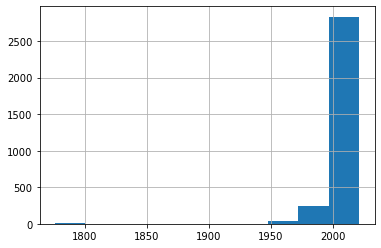

In [41]:
facility['yr_complete'].hist()

In [42]:
facility.head()

,OBJECTID,STREET_NAME,LENGTH_MILES,STATUS,COMPKEY,CATALYTIC_PROJECTS,NETWORK,DATE_COMPLETED,EXISTING_FACILITY_TYPE,PLANNED_FACILITY_TYPE,PROJECT_NUMBER,DATE_PLANNED,DATE_EXPIRED,SHAPE_Length,yr_complete
0,72198,S LANDER ST,0.043555,NaN,20625.0,NaN,NaN,2009-12-31T00:00:00.000Z,Sharrow,NaN,NaN,NaN,NaN,229.971589,2009.0
1,72199,S LANDER ST,0.007561,NaN,20631.0,NaN,NaN,2010-12-31T00:00:00.000Z,Sharrow,NaN,NaN,NaN,NaN,39.924071,2010.0
2,72200,S LANDER ST,0.035984,NaN,20629.0,NaN,NaN,2010-12-31T00:00:00.000Z,Sharrow,NaN,NaN,NaN,NaN,189.994683,2010.0
3,72201,S LANDER ST,0.028451,NaN,20632.0,NaN,NaN,2010-12-31T00:00:00.000Z,Sharrow,NaN,NaN,NaN,NaN,150.223239,2010.0
4,72202,S LANDER ST,0.070049,NaN,20633.0,NaN,NaN,2010-12-31T00:00:00.000Z,Sharrow,NaN,NaN,NaN,NaN,369.859095,2010.0
